In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import pi, sin, cos, dot, tensordot
from numpy.linalg import multi_dot
from mpl_toolkits.mplot3d import Axes3D

class TF:
    def __init__(self, n, d):
        self.index = n
        self.thickness = d
        
    def matrix(self, w):
        delta = 2*pi*(self.index)*(self.thickness)/w
        ita = self.index
        element = pd.DataFrame(
            {'e1':cos(delta), 'e2':1j/ita*sin(delta), 'e3':1j*ita*sin(delta), 'e4':cos(delta)}
        )
        matrix = np.reshape(element.values.reshape(1,-1), (np.size(w), 2, 2))
        return matrix

def Eq_dl(layer_2, layer_1, ns):
    eq = dot(
        [dot(layer_2[i], layer_1[i]) for i in range(np.size(target_w))],
        np.array([[1], [ns]]))
    d, _, _ = np.shape(eq)
    y = pd.DataFrame(np.reshape(eq, (d, 2)), columns = ['B','C'])
    Y = y['C']/y['B']
    return Y.values.reshape(d, 1)
    
def R(Eq, n0):
    r = (1-Eq)/(1+Eq)
    R = np.reshape(r*r.conjugate(), np.size(Eq))
    return np.real(R)

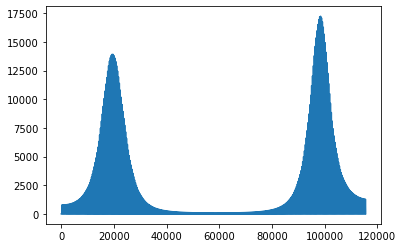

In [4]:
# Figure of Merit
def FoM(h, t):
    return 1/sum((h-t)**2)

# parameter
target_w = np.linspace(1350,1550, 100)
target_R = np.zeros(np.size(target_w))
substrate = 1.8
# iteration
merit = []

for d1 in range(0, 340):
    for d2 in range(0, 340):
        layer1 = TF(2.1, d1).matrix(target_w)
        layer2 = TF(1.42, d2).matrix(target_w)
        R_hypo = R(Eq_dl(layer2, layer1, substrate), 1)
        merit.append([FoM(R_hypo, target_R), d1, d2])

M = [i[0] for i in merit]
plt.plot(list(range(np.size(M))), M)
plt.show()

In [5]:
FoM_data = pd.DataFrame(merit)
max_idx = FoM_data[0].idxmax()
print(FoM_data[1][max_idx], FoM_data[2][max_idx])

289 224


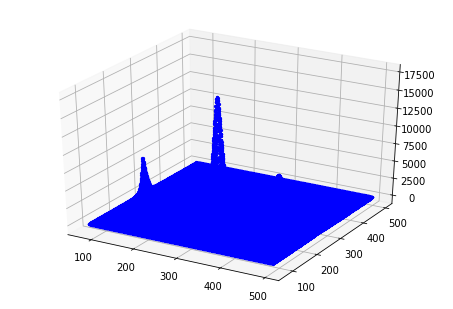

In [54]:
fig = plt.figure()
ax = Axes3D(fig)
#ax.plot_surface(merit)
for i in merit:
    ax.scatter(i[1], i[2], i[0], marker = '.', c = 'b')